In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline

In [5]:
def read_data():
    df = pd.read_csv('/kaggle/input/combine-dataset-2009-2011/combine_dataset_2009_2011.csv', parse_dates=['InvoiceDate'], infer_datetime_format=True)
    df.columns = df.columns.str.strip()
    df['Price'] = df['Price'].astype(str).str.replace(",", "").astype(float)
    df.columns.values[-4] = "YEAR"

    return df

def calculate_extra_cols(df):
    df['total_price'] =  df['Price'] * df['Quantity'] 
    return df

In [11]:
df = read_data()
df = calculate_extra_cols(df)
df["MES"] = df["InvoiceDate"].dt.month
df.head()

<ipython-input-5-14648a76b1ce>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/kaggle/input/combine-dataset-2009-2011/combine_dataset_2009_2011.csv', parse_dates=['InvoiceDate'], infer_datetime_format=True)


,Invoice,StockCode,Description,Quantity,InvoiceDate,YEAR,Price,Customer ID,Country,total_price,MES
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,13085.0,United Kingdom,83.4,12
1,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,13085.0,United Kingdom,100.8,12
2,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom,30.0,12
3,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,2009,1.65,13085.0,United Kingdom,39.6,12
4,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom,30.0,12


#### Articles sold per year

<Axes: xlabel='YEAR'>

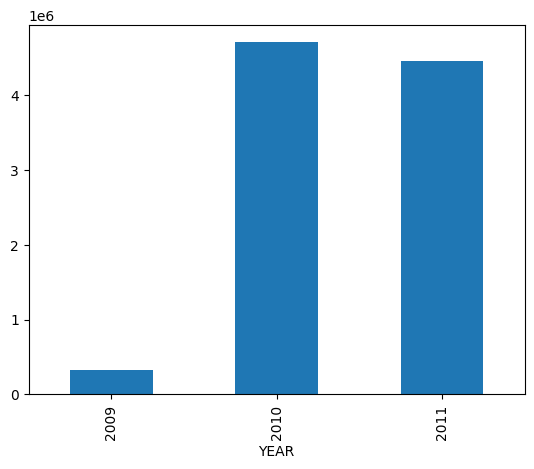

In [12]:
art_year = df.groupby('YEAR')[["Quantity", "total_price"]].sum()
art_year['Quantity'].plot(kind='bar')

#### Articles sold per month across all years

<Axes: xlabel='MES'>

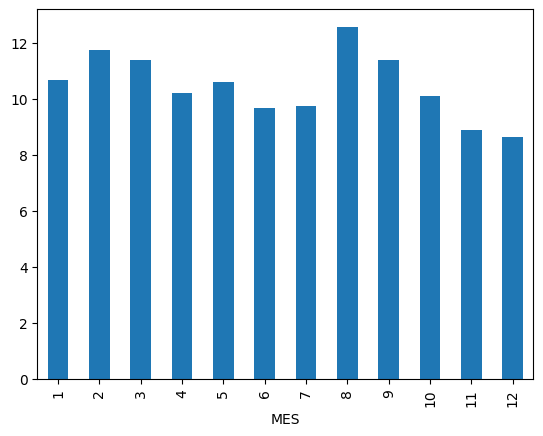

In [13]:
art_month = df.groupby('MES')["Quantity"].mean()
art_month.sort_index().plot(kind='bar')

#### Articles sold per month per year

<Axes: xlabel='YEAR,MES'>

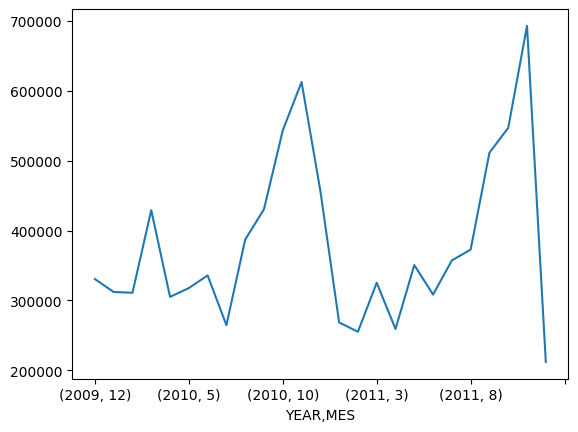

In [14]:
month_year = df.groupby(["YEAR", "MES"])['Quantity'].sum()
month_year.plot()
# per = new.index.to_period("M")
# plt.bar(per.value_counts())

#### Jumping into time series

Text(0.5, 0, 'Years')

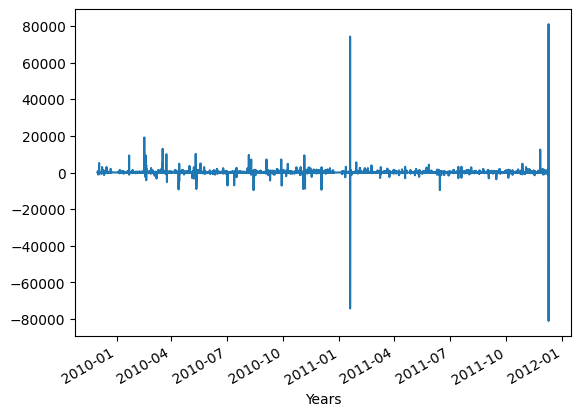

In [15]:
ts = df.set_index("InvoiceDate")[["Quantity", "total_price"]]
ts = ts[~ts["total_price"].isnull()]
ts["total_price"] /= 100.0
ts = ts.sort_index()
axes = ts["Quantity"].plot()
axes.set_xlabel("Years")

#### Lets try a transformation to the data

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Text(0.5, 0, 'Years')

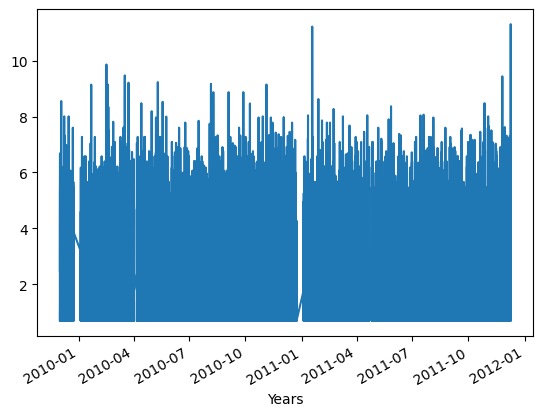

In [16]:
logts = np.log(ts["Quantity"])
axes = logts[logts > 0].plot()
axes.set_xlabel("Years")

#### After resampling to the sum of months 

<ipython-input-17-f78517a02898>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_ts = ts.resample('M').sum().sort_index()


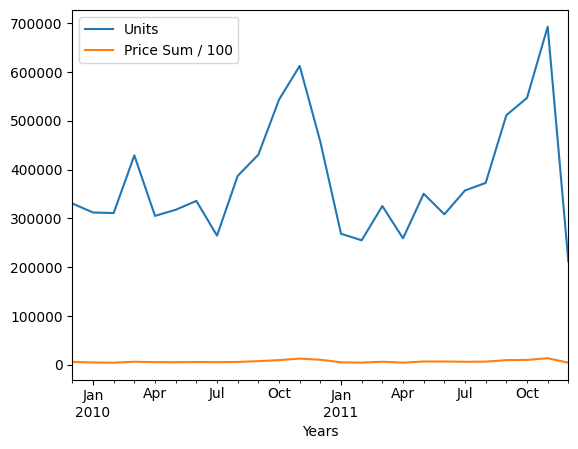

In [17]:
month_ts = ts.resample('M').sum().sort_index()
axes = month_ts.plot()
axes.set_xlabel("Years")
axes.legend(labels=["Units", "Price Sum / 100"])

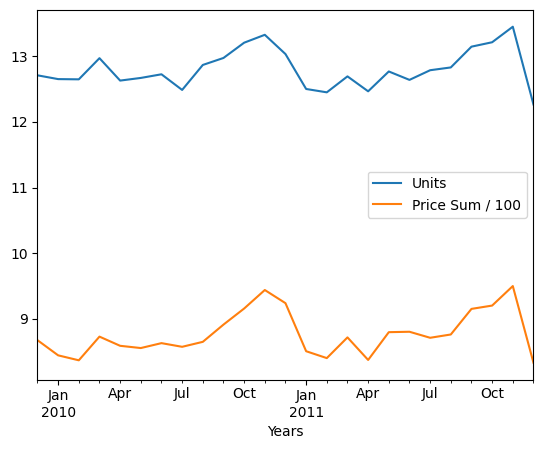

In [18]:
log_month_ts = np.log(month_ts)
axes = log_month_ts.plot()
axes.set_xlabel("Years")
axes.legend(labels=["Units", "Price Sum / 100"])